In [154]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from sklearn.metrics import auc
from matplotlib import cm
from KDEpy import FFTKDE
import lower as low
importlib.reload(low)

<module 'lower' from '/data/dominik/lower_order/new_scripts/lower.py'>

In [124]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import newton
import scipy as sc
import math
from pyteomics import pepxml
import random
import os
import glob
from collections import deque
import pickle
import importlib as imp
from KDEpy import FFTKDE
from sklearn.metrics import auc
import lower as low
import param_estim as pe
imp.reload(low)
imp.reload(plt)
imp.reload(pe)
lows = low.Tools()
ems = low.EM()
import random
import warnings
import full_analysis as fa
imp.reload(fa)
warnings.filterwarnings("ignore")
#lows.universal_ppf(0.7, 5, 0.1, 0.02)
import re

In [136]:
%timeit list(filter(lambda x: "LH" in x, paths))

676 ns ± 5.42 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
pvs = deque()
labels = deque()
charges = deque()
scores = deque()
pars = []

#process randoms
def parse_data(keyword, paths, label_value)
rand_paths = list(filter(lambda x: keyword in x, paths))
items = deque()

for pepxml_file in rand_paths:
    cur_file = pepxml.read(pepxml_file)
    data = list(cur_file.map(get_data, pars))
    items += deque()

scores += [x[0] for x in items]
charges += [x[1] for x in items]
pvs += [x[2] for x in items]
labels += label_value*np.ones(len(items))
    

#process decoys

#process pos

for path in paths:
    cur_file = pepxml.read(path)
    data = list(cur_file.map(get_data))
    items += data
            
        tev = [x[0] for x in items]
        charges = [x[1] for x in items]
        big_n = [x[2] for x in items]
 
        return tev, charges, big_n
    
    
def get_data(row, pars):
    
    tev = -0.02 * np.log((el['search_hit'][0]['search_score']['expect']) / 1000)
    ch = int(el['assumed_charge'])
    #spec = el['spectrum']

    if ch not in [2,3,4]:
        pv = 1
    else:
        pv = 1 - lows.mubeta_cdf(tev, pars[ch][0], pars[ch][1])

    return tev, ch, pv
            

In [ ]:
length = 500000
pvs = -1*np.ones(length)
labels = np.zeros(length)
charges = np.zeros(length)
tevss = np.zeros(length)
k=0

for pepxml_file in paths:
    d = pepxml.read(pepxml_file)
    
    for el in d:
        if 'search_hit' in el.keys():

            tev = -0.02 * np.log((el['search_hit'][0]['search_score']['expect']) / 1000)
            ch = int(el['assumed_charge'])
            spec = el['spectrum']
            
            if ch not in [2,3,4]:
                p_v = 1
            else:
                p_v = 1 - lows.mubeta_cdf(tev, pars[ch][0], pars[ch][1])

            label = 3
            if "decoy" in spec:
                label = 4
            elif "random" in spec:
                label = 0
            elif "pos" in spec:
                label = 1

            pvs[k] = p_v
            labels[k] = label
            charges[k] = ch
            tevss[k] = tev
            k += 1
        
df = pd.DataFrame(np.array([pvs, labels, charges, tevss]).T)
df.columns = ['pv_low', 'label', 'charge', 'tev']
df = df[df['pv_low'] != -1]       

In [137]:
paths = sorted(glob.glob(os.path.join("/data/dominik/lower_order/validation/tolerance_study", "536BA22_L.mzXML_LH.pep.xml")))
paths

['/data/dominik/lower_order/validation/tolerance_study/536BA22_L.mzXML_LH.pep.xml']

In [123]:
obj = fa.Analyze("testing")
best_params = obj.execute_estimation(paths)
#stats = obj.execute_validation(decs+tar, ref_dict)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [155]:
viridis = cm.get_cmap('viridis', 12)

In [507]:
#simulation to investigate effects of LR on mu and beta

#generate normal distribution, log-transform, fit LR with different settings (one extends too much to the left)


def get_linreg(sample, survival, alpha):
    
    th = int(alpha*len(sample))
    tail_y = np.log(1-survival[-th:-10])
    tail_x = sample[-th:-10]
    lin_reg = st.linregress(tail_x, tail_y)
    #print(lin_reg)
    return lin_reg, tail_x, tail_y

def get_tevs(lr, sample, beta, mu):
    
    evs = np.exp(lr.slope*sample + lr.intercept)
    #tevs = -beta*np.log(evs/np.exp(mu/beta))
    return evs


def get_expon(sample, alpha):
    
    th = int(alpha*len(sample))
    subsample = sorted(sample)[-th:-10]
    mu = min(subsample)
    lambda_0 = (len(subsample)-1)/(np.sum(subsample-mu))
    print(1/lambda_0)
    print(mu)
    pvs = (1 - st.expon.cdf(subsample[-10:][::-1], loc=mu, scale=1/lambda_0))
    return pvs

    
#get e-values, generate TEVs, plot distributions, estimate mu and beta

In [520]:
get_expon(sample, 0.1)

0.4591138512731459
1.7874740166199075


array([0.02146987, 0.0220285 , 0.02292651, 0.02588986, 0.02644621,
       0.02702347, 0.02743772, 0.02813509, 0.02848042, 0.02994713])

In [519]:
st.expon.fit(sorted(sample)[-int(0.1*len(sample)):])

(1.7874740166199075, 0.47472934444638626)

/data/dominik/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


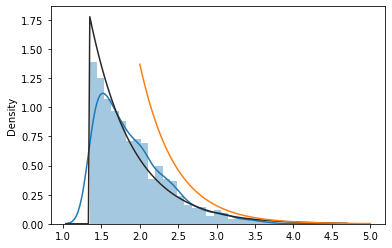

In [516]:
sns.distplot(sorted(sample)[-int(0.2*len(sample)):], fit=st.expon)
plt.plot(np.linspace(2, 5, 1000), st.expon.pdf(np.linspace(2, 5, 1000), loc=1.787, scale=0.459))

In [508]:

N=1000
"""
tevs = np.zeros((N,10))
trues = np.zeros((N,10))
for i in range(N):
    
    sample = np.array(sorted(st.norm.rvs(0.5, 1, 1000)))
    survival = (np.arange(len(sample))+1)/len(sample)
    lr, tail_x, tail_y = get_linreg(sample, survival, 0.05)
    tv = get_tevs(lr, sample[-10:][::-1], 0.02, 0.1)
    tevs[i,:] = tv
    trues[i,:] = (1-st.norm.cdf(sample[-10:][::-1], 0.5, 1))

    """
    
tevs2 = np.zeros((N,10))  
trues2 = np.zeros((N,10)) 
expons = np.zeros((N,10))
for i in range(N):
    np.random.seed()
    sample = np.array(sorted(st.norm.rvs(0.5, 1, 10000)))
    survival = (np.arange(len(sample))+1)/len(sample)
    lr, tail_x, tail_y = get_linreg(sample, survival, 0.05)
    tv = get_tevs(lr, sample[-10:][::-1], 0.02, 0.1)
    tevs2[i,:] = tv
    trues2[i,:] = (1-st.norm.cdf(sample[-10:][::-1], 0.5, 1))
    expons[i,:] = get_expon(sample, 0.05)

0.3716592283989007
2.162254310260609
0.40259652408415825
2.1618526790444723
0.40937761162305986
2.1689112251897793
0.40422116475779457
2.114329454226352
0.38840543862407173
2.1609712633158455
0.37802629990715986
2.1192885796646985
0.3801422708025522
2.1416375794998963
0.4263711638391632
2.1348664524092746
0.40106633802007396
2.1549894378544527
0.37692746832816854
2.1459823375266973
0.3955909271051165
2.1704091919727273
0.3888469679435293
2.1433134589150837
0.38543340208685295
2.1255486700335933
0.3891721588491609
2.1700401965716396
0.387423019919651
2.131998752641199
0.40099510891968965
2.145869527903466
0.3723673715606599
2.1358889501625353
0.3833067926332528
2.1417423858891427
0.4099383327397307
2.133082000936361
0.3606474424185142
2.143818034990568
0.39241167530857335
2.1559332965038625
0.40179645330476127
2.152339509527765
0.38575514561253516
2.159929398214499
0.40260083202073477
2.116352082782737
0.4002252510830637
2.131105087049251
0.41290885908246666
2.1425535278365597
0.3939790

In [254]:
df = pd.DataFrame()
for dx in np.arange(10):
    df[dx] = (tevs2[:,dx]-trues2[:,dx])/trues2[:,dx]
df.columns = np.arange(10)

In [509]:
df5 = pd.DataFrame()
t1 = []
t2 = []
t3 = []
texpon = []
no = 10000
for dx in np.arange(10):
    t1+= list(no*trues2[:,dx])
    t2 += list(no*tevs2[:,dx])
    texpon += list(no*expons[:,dx])
    t3 += list(dx*np.ones(len(trues2[:,dx]))+1)

df5['true EV'] = t1
df5['estimated EV'] = t2
df5['hit'] = t3
df5['hit'] = df5['hit'].astype('int')
df5['relative bias'] = (np.array(t2) - np.array(t1))/np.array(t1)
df5['TEV'] = -0.02*np.log(df5['estimated EV']/1000)
df5['expon'] = texpon

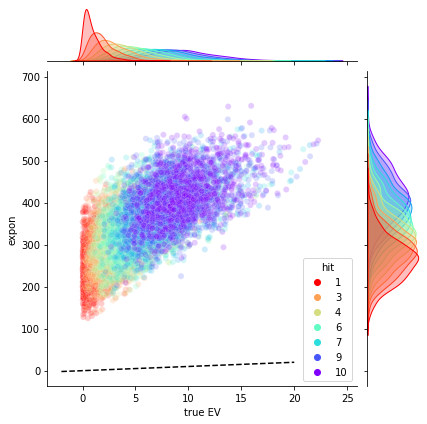

In [511]:
#ax.plot([0, 25], [0, 25])

plot = sns.jointplot(data=df5, x="true EV", y="expon", hue="hit", palette='rainbow_r', alpha=0.2)
plot.ax_joint.plot([-2, 20], [-2, 20], color='k', linestyle='--')
#plt.savefig("./graphs/scatters_cutoff0005_10000.png", dpi=400)
#sns.jointplot(data=df4, x="true", y="estim", kind='kde')
#sns.kdeplot(data=df3, x="true", y="estim",  fill=0)


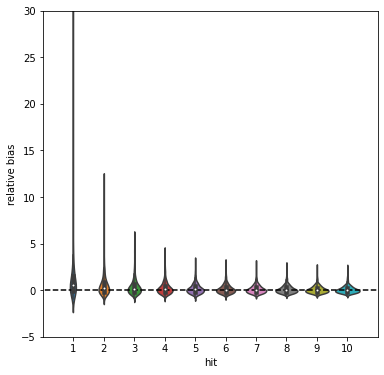

In [303]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(data=df5, x="hit", y="relative bias", ax=ax)
ax.hlines(xmin=-2, xmax=11, y=0, color='k', linestyle='--')
ax.set_xlim(-1, 10)
ax.set_ylim(-5, 30)
plt.savefig("./graphs/violin_seaborn_cutoff0005_10000.png", dpi=400)

In [308]:
es = low.Tools()

In [453]:
mus = []
betas = []

for i in range(10):
    mu1, b1 = es.mle_new(df5[df5.hit == i+1]['TEV'].to_numpy(), i)
    mus.append(mu1)
    betas.append(b1)

In [433]:
betas

[0.007857427226911212,
 0.008008014352813843,
 0.008587556521175287,
 0.008895075735366634,
 0.009156820185627522,
 0.00913370916482222,
 0.009201944265750628,
 0.00936457494306461,
 0.009579458360817233,
 0.009559528260019459]

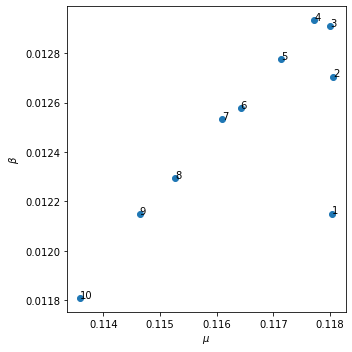

In [454]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(mus, betas)
annotations = np.arange(10) +1
for i, label in enumerate(annotations):
    plt.annotate(label, (mus[i], betas[i]))
ax.set_ylabel(r"$\beta$")
ax.set_xlabel(r"$\mu$")
fig.tight_layout()
fig.savefig(f"./graphs/mubeta_LR_simulation_cutoff005.png", dpi=500)


(0.14033324209742637, 0.018719260670693978)


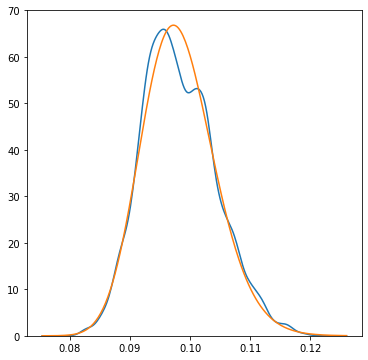

In [447]:
plot_results(df5[df5.hit==5]['TEV'].to_numpy(), 9)
        

In [319]:
def plot_results(tevs, n):
 
    axes, kde = FFTKDE(bw=0.001, kernel='gaussian').fit(tevs).evaluate(2**8)
    kde = kde/auc(axes, kde)
    p = es.mle_new(tevs, n)
    print(p)
    theory = es.pdf_mubeta(axes, p[0], p[1], n)           
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(axes, kde)
    #ax.hist(tevs[:,n], bins=30)
    ax.plot(axes, theory)
    ax.set_ylim(0,)

-0.981239653629634


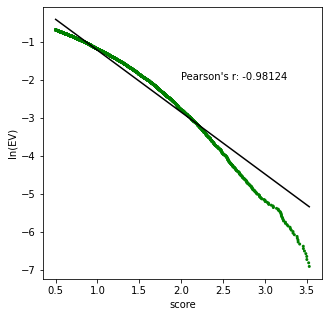

In [462]:
cut = 0.5
sample = np.array(sorted(st.norm.rvs(0.5, 1, 10000)))
survival = (np.arange(len(sample))+1)/len(sample)
lr, tail_x, tail_y = get_linreg(sample, survival, cut)
tv = get_tevs(lr, sample[-10:][::-1], 0.02, 0.05)
tevs2[i,:] = tv
print(lr.rvalue)
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=tail_x, y=tail_y, color='green', marker='.', edgecolor='none')
plt.xlabel("score")
plt.ylabel("ln(EV)")
#ax.scatter(tail_x, tail_y, marker='x', c='g')
ax.plot([min(tail_x), max(tail_x)], [min(tail_x)*lr.slope+lr.intercept,max(tail_x)*lr.slope+lr.intercept], c='k')
ax.text(x=2., y=-2, s=f"Pearson's r: {lr.rvalue:.5f}" )
fig.savefig("./graphs/LR_cutoff05_10000.png", dpi=400)


In [466]:
sample = st.norm.rvs(1, 0.5, 100)

In [468]:
def first_moment(data):
    return np.mean(data)

def second_moment(data):
    return (1/len(data))*np.sum([el**2 for el in data])

mu_hat = first_moment(sample)
sigma2_hat = second_moment(sample) - mu_hat**2
print(mu_hat, np.sqrt(sigma2_hat))

0.9123842397191589 0.46001600622837635


In [899]:
df = pd.read_csv('/data/dominik/covid/cumuls.txt', delimiter=' ', header=None)

In [901]:
df

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,4.372802,4.062657,3.933487,3.777137,3.588944,3.393048,3.168497,2.900913,2.61595,2.340444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000,NaN


In [904]:
df.iloc[0,3:14]

3     3.777137
4     3.588944
5     3.393048
6     3.168497
7     2.900913
8     2.615950
9     2.340444
10    2.130334
11    1.929419
12    1.755875
13    0.698970
Name: 0, dtype: float64

In [777]:
a[a>0]

0     4.279918
1     3.963032
2     3.866878
3     3.755341
4     3.637790
5     3.503382
6     3.353916
7     3.197556
8     3.027350
9     2.827369
10    2.621176
11    2.392697
12    2.143015
13    1.919078
14    1.623249
15    1.322219
16    0.903090
Name: 9, dtype: float64

In [905]:
y = df.iloc[0,3:14].to_numpy()
x = np.arange(len(y))+3

In [875]:
y

array([4.453425, 4.091315, 3.927576, 3.72632 , 3.491222, 3.226084,
       2.921686, 2.584331, 2.235528, 1.857332, 1.50515 , 1.079181,
       0.69897 , 0.30103 ,     -inf])

In [873]:
y

array([4.453425, 4.091315, 3.927576, 3.72632 , 3.491222, 3.226084,
       2.921686, 2.584331, 2.235528, 1.857332, 1.50515 , 1.079181,
       0.69897 , 0.30103 ])

6.365972550294987
10.691959622442635


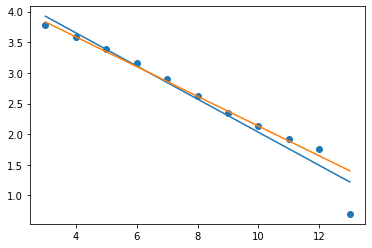

In [908]:
plt.scatter(x,y)
plt.plot([x[0], x[-1]], [lr.slope*x[0] + lr.intercept, lr.slope*x[-1] + lr.intercept])
plt.plot([x[0], x[-1]], [ts[0]*x[0] + ts[1], ts[0]*x[-1] + ts[1]])
print(pow(10, 10*lr.slope*1.454+lr.intercept))
print(pow(10, 10*ts[0]*1.454 + ts[1]))

In [907]:
lr = st.linregress(x, y)
ts = theil_sen(x,y)
print(lr.slope, lr.intercept)
print(ts)
#slope = -0.348148
#intercept = 4.93307
#ts = [-0.354134, 4.99675]

-0.27046175454545457 4.736378672727273
(-0.24287350000000002, 4.560438)


In [692]:
pow(10,-2.4514*1.454 + 4.49832)

8.589826660125915

In [803]:
y

8     3.027350
9     2.827369
10    2.621176
11    2.392697
12    2.143015
13    1.919078
14    1.623249
15    1.322219
16    0.903090
Name: 9, dtype: float64

In [881]:
def theil_sen(x, y):

    n = len(x)
    #get slope

    ms = []

    for i in range(n):
        for j in range(n):
            if  i >= j: continue
            if (y[i] < 0) | (y[j] < 0): continue
            m = (y[i] - y[j])/(x[i] - x[j])
            ms.append(m)
    
    opt_m = np.median(ms)

    #get intercept
    bs = []
    for i in range(n):
        if (y[i] < 0): continue
        b = y[i] - opt_m*x[i]
        bs.append(b)
    
    opt_b = np.median(bs)

    return opt_m, opt_b